## Exercice 2

In [27]:
# -*- coding: utf-8 -*-

# Authors: Vlad Niculae, Alexandre Gramfort, Slim Essid
# License: BSD

from time import time
from numpy.random import RandomState
import pylab as pl
import numpy as np
import sklearn
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedKFold
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score


Dataset consists of 400 faces
2061 negative-valued pixels
2773 negative-valued pixels
2630 negative-valued pixels
1422 negative-valued pixels
1242 negative-valued pixels
1004 negative-valued pixels
2049 negative-valued pixels
1580 negative-valued pixels
1387 negative-valued pixels
3819 negative-valued pixels
1707 negative-valued pixels
1863 negative-valued pixels
2350 negative-valued pixels
1772 negative-valued pixels
1834 negative-valued pixels
96 negative-valued pixels
3189 negative-valued pixels
1595 negative-valued pixels
2176 negative-valued pixels
2741 negative-valued pixels
667 negative-valued pixels
1793 negative-valued pixels
1307 negative-valued pixels
1762 negative-valued pixels
863 negative-valued pixels
1102 negative-valued pixels
811 negative-valued pixels
1802 negative-valued pixels
2668 negative-valued pixels
1195 negative-valued pixels
720 negative-valued pixels
2681 negative-valued pixels
3596 negative-valued pixels
1380 negative-valued pixels
890 negative-valued pixe

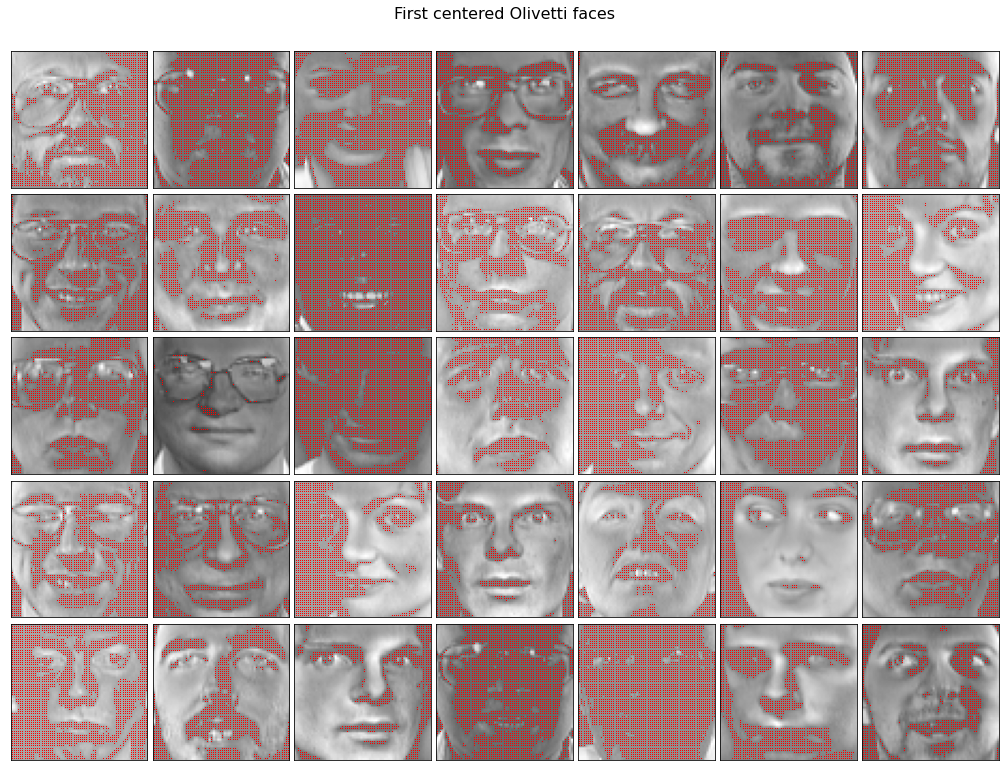

Extracting the top 35 Eigenfaces - PCA...
0.9275
Extracting the top 35 Non-negative components - NMF...
0.9675
Extracting the top 35 Independent components - FastICA...


C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


0.9324999999999999


C:\Users\antoi\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [34]:
# -- Prepare data and define utility functions ---------------------------------

n_row, n_col = 5, 7
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0, dtype=np.float64)

print("Dataset consists of {} faces".format(n_samples))


def plot_gallery(title, images):
    pl.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    pl.suptitle(title, size=16)
    for i, comp in enumerate(images):
        pl.subplot(n_row, n_col, i + 1)

        comp = comp.reshape(image_shape)
        vmax = comp.max()
        vmin = comp.min()
        dmy = np.nonzero(comp < 0)
        if len(dmy[0]) > 0:
            yz, xz = dmy
        comp[comp < 0] = 0

        pl.imshow(comp, cmap=pl.cm.gray, vmax=vmax, vmin=vmin)
        # print "vmax: %f, vmin: %f" % (vmax, vmin)
        # print comp

        if len(dmy[0]) > 0:
            pl.plot(xz, yz, "r,")
            print(len(dmy[0]), "negative-valued pixels")

        pl.xticks(())
        pl.yticks(())

    pl.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.0)
    pl.show()


# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# -- Decomposition methods -----------------------------------------------------

# List of the different estimators and whether to center the data

estimators = [
    (
        "pca",
        "Eigenfaces - PCA",
        decomposition.PCA(n_components=n_components, whiten=True),
        True,
    ),
    (
        "nmf",
        "Non-negative components - NMF",
        decomposition.NMF(
            n_components=n_components, init=None, tol=1e-6, max_iter=1000
        ),
        False,
    ),
    (
        "ica",
        "Independent components - FastICA",
        decomposition.FastICA(
            n_components=n_components, whiten=True, tol=1e-6, max_iter=10
        ),
        True,
    ),
]

# -- Transform and classify ----------------------------------------------------
labels = dataset.target

X, X_ = faces, faces_centered

for shortname, name, estimator, center in estimators:
    # if shortname != 'nmf': continue
    print("Extracting the top {:d} {:s}...".format(n_components, name))
    t0 = time()

    data = X
    if center:
        data = X_
    #data = estimator.fit_transform(data)

    #train_time = time() - t0
    #print("done in {:0.3f}s".format(train_time))

    #components_ = estimator.components_

    #plot_gallery(
    #    "{:s} - Train time {:.1f}s".format(name, train_time), components_[:n_components]
    #)
    
    score = 0
    for k in range(5) :
        X_train, X_test =  np.concatenate((data[0:int(k * len(data) / 5),:], data[int((k + 1) * len(data) / 5):,:])) , data[int(k * len(data) / 5):int((k + 1) * len(data) / 5),:]
        y_train, y_test = np.concatenate((labels[0:int(k * len(data) / 5)], labels[int((k + 1) * len(data) / 5):])) , labels[int(k * len(data) / 5):int((k + 1) * len(data) / 5)]
        estimator.fit(X_train)
        W_train = estimator.transform(X_train)

        W_test = estimator.transform(X_test)

        clf = LDA()
        clf.fit(W_train, y_train)
        score += clf.score(W_test, y_test)
                           
    print(score / 5)
        
    

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0)

In [32]:
().shape

(52, 4096)

## Exercice 3 :

In [36]:
from time import time
from sklearn.feature_extraction import text
from sklearn import decomposition
from sklearn import datasets

n_samples = 1000
n_features = 1000
n_topics = 10
n_top_words = 20

# Load the 20 newsgroups dataset and vectorize it using the most common word
# frequency with TF-IDF weighting (without top 5% stop words)

t0 = time()
print("Loading dataset and extracting TF-IDF features...")
dataset = datasets.fetch_20newsgroups(data_home="c:/tmp/", shuffle=True, random_state=1)

vectorizer = text.CountVectorizer(stop_words='english', max_features=n_features)
counts = vectorizer.fit_transform(dataset.data[:n_samples])
tfidf = text.TfidfTransformer().fit_transform(counts)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print(
    "Fitting the NMF model on with n_samples=%d and n_features=%d..."
    % (n_samples, n_features)
)
nmf = decomposition.NMF(n_components=n_topics).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

# Inverse the vectorizer vocabulary to be able
feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(
        " ".join([feature_names[i] for i in topic.argsort()[: -n_top_words - 1 : -1]])
    )
    print(" ")

Loading dataset and extracting TF-IDF features...
done in 0.889s.
Fitting the NMF model on with n_samples=1000 and n_features=1000...
done in 1.275s.
Topic #0:
edu university cs organization subject lines posting host nntp article cc writes reply distribution uiuc state washington john cwru pitt
 
Topic #1:
god bible jesus christian people life christians christ religion faith mary believe christianity church belief say think children good does
 
Topic #2:
com hp article writes netcom sun corp stratus organization posting nntp subject lines host portal jim news distribution att reply
 
Topic #3:
windows drive help problem card software monitor file dos drivers using use driver pc color thanks window computer version video
 
Topic #4:
clipper key chip encryption government keys public secure use enforcement people law house secret brad algorithm standard phone pat security
 
Topic #5:
nasa gov space jpl center research shuttle moon program laboratory distribution brian earth world data 